# Classification des entreprises



In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

## Chargement des données

In [19]:
#referentiel base source
source_entreprise=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_entreprise.shape

(8095, 330)

In [20]:
colonnes = list(source_entreprise.columns)
for colonne in colonnes:
    print(colonne)

Unnamed: 0
Unnamed: 0_x
ape_code
siren
siret
capital
enrollment
last_number_of_employees
employees_number_for_linkedin
revenue_2021
revenue_2020
revenue_2019
revenue_2018
net_result_2021
equity_2021
roe_2021
net_debt_2021
current_assets_2021
current_liabilities_2021
solvability_ratio_2021
gross_operating_ebitda_2021
gross_operating_ebitda_ratio_2021
reimbursement_ratio_2021
robustness_ratio_2021
net_result_2020
equity_2020
roe_2020
net_debt_2020
current_assets_2020
current_liabilities_2020
solvability_ratio_2020
gross_operating_ebitda_2020
gross_operating_ebitda_ratio_2020
reimbursement_ratio_2020
robustness_ratio_2020
net_result_2019
equity_2019
roe_2019
net_debt_2019
current_assets_2019
current_liabilities_2019
solvability_ratio_2019
gross_operating_ebitda_2019
gross_operating_ebitda_ratio_2019
reimbursement_ratio_2019
robustness_ratio_2019
net_result_2018
equity_2018
roe_2018
net_debt_2018
current_assets_2018
current_liabilities_2018
solvability_ratio_2018
gross_operating_ebitda_201

In [26]:
source_entreprise_extract=source_entreprise[['ape_code','revenue_2022','resultat_exploitation_ratio_2022','last_number_of_employees','enrollment',
                                             'equity_2022','current_assets_2022',
                                             'gross_operating_ebitda_ratio_2022','net_result_2022','current_liabilities_2022',
                                             'capital','roe_2022',
                                             'net_debt_2022','reimbursement_ratio_2022',
                                             'siren','siret','robustness_ratio_2022',
                                             'societeinfo_growth_ratio_2022','gross_operating_ebitda_2022',
                                             'resultat_d_exploitation_2022','solvability_ratio_2022',
                                             'resultat_exploitation_ratio','net_result','current_assets','equity',
                                             'current_liabilities','revenue','robustness_ratio','solvability_ratio',
                                             'net_debt','gross_operating_ebitda','gross_operating_ebitda_ratio','CAGR_18_22',
                                             'RCI_2022','RCI','total_fonds','equity_costs',
                                             'RdtCpx_2022','RdtCpx','reimbursement_ratio','RCI_21_22',
                                             'capital_moy_sect','enrollment_moy_sect','last_number_of_employees_moy_sect',
                                             'employees_number_for_linkedin_moy_sect','revenue_2022_moy_sect',
                                             'net_result_2022_moy_sect','equity_2022_moy_sect','roe_2022_moy_sect',
                                             'net_debt_2022_moy_sect','current_assets_2022_moy_sect',
                                             'current_liabilities_2022_moy_sect','solvability_ratio_2022_moy_sect',
                                             'gross_operating_ebitda_2022_moy_sect','gross_operating_ebitda_ratio_2022_moy_sect',
                                             'gross_operating_ebitda_ratio_moy_sect','reimbursement_ratio_2022_moy_sect',
                                             'robustness_ratio_2022_moy_sect','societeinfo_growth_ratio_2022_moy_sect',
                                             'resultat_exploitation_ratio_2022_moy_sect','resultat_d_exploitation_2022_moy_sect',
                                             'resultat_exploitation_ratio_moy_sect','net_result_moy_sect','current_assets_moy_sect',
                                             'equity_moy_sect','current_liabilities_moy_sect','revenue_moy_sect',
                                             'reimbursement_ratio_moy_sect','robustness_ratio_moy_sect','solvability_ratio_moy_sect',
                                             'net_debt_moy_sect','gross_operating_ebitda_moy_sect','CAGR_18_22_moy_sect',
                                             'RCI_2022_moy_sect','RCI_moy_sect','total_fonds_moy_sect','equity_costs_moy_sect',
                                             'enrollment_sum','last_number_of_employees_sum','employees_number_for_linkedin_sum',
                                             'revenue_2022_sum','roe_2022_sum','net_debt_2022_sum','gross_operating_ebitda_2022_sum',
                                             'resultat_d_exploitation_2022_sum','net_result_sum','revenue_sum','net_debt_sum',
                                             'pdm','pdm_2022']]

In [27]:
colonnes = list(source_entreprise_extract.columns)
for colonne in colonnes:
    print(colonne)

ape_code
revenue_2022
resultat_exploitation_ratio_2022
last_number_of_employees
enrollment
equity_2022
current_assets_2022
gross_operating_ebitda_ratio_2022
net_result_2022
current_liabilities_2022
capital
roe_2022
net_debt_2022
reimbursement_ratio_2022
siren
siret
robustness_ratio_2022
societeinfo_growth_ratio_2022
gross_operating_ebitda_2022
resultat_d_exploitation_2022
solvability_ratio_2022
resultat_exploitation_ratio
net_result
current_assets
equity
current_liabilities
revenue
robustness_ratio
solvability_ratio
net_debt
gross_operating_ebitda
gross_operating_ebitda_ratio
CAGR_18_22
RCI_2022
RCI
total_fonds
equity_costs
RdtCpx_2022
RdtCpx
reimbursement_ratio
RCI_21_22
capital_moy_sect
enrollment_moy_sect
last_number_of_employees_moy_sect
employees_number_for_linkedin_moy_sect
revenue_2022_moy_sect
net_result_2022_moy_sect
equity_2022_moy_sect
roe_2022_moy_sect
net_debt_2022_moy_sect
current_assets_2022_moy_sect
current_liabilities_2022_moy_sect
solvability_ratio_2022_moy_sect
gross

In [28]:
# Remplacez 'source_entreprise_extract' par le nom réel de votre DataFrame
source_entreprise_extract = source_entreprise_extract.copy()

# Liste des colonnes pour lesquelles limiter les valeurs extrêmes
columns = ['societeinfo_growth_ratio_2022', 'societeinfo_growth_ratio_2022_moy_sect', 'solvability_ratio_2022', 'robustness_ratio_2022',
           'gross_operating_ebitda_ratio_2022', 'CAGR_18_22', 'reimbursement_ratio_2022']

# Remplacer les valeurs extrêmes pour chaque colonne
for col in columns:
    lower_bound = source_entreprise_extract[col].quantile(0.01)
    upper_bound = source_entreprise_extract[col].quantile(0.99)
    source_entreprise_extract[col] = source_entreprise_extract[col].clip(lower=lower_bound, upper=upper_bound)

# Affichez le nouveau résumé des statistiques pour vérifier les changements
for col in columns:
    print(f"{col} après remplacement des valeurs extrêmes:")
    print(source_entreprise_extract[col].describe())
    print("\n")  # Ajoute un espace entre les descriptions pour plus de clarté

societeinfo_growth_ratio_2022 après remplacement des valeurs extrêmes:
count    1961.000000
mean        0.194927
std         0.505548
min        -0.363352
25%         0.000000
50%         0.083702
75%         0.217074
max         3.834008
Name: societeinfo_growth_ratio_2022, dtype: float64


societeinfo_growth_ratio_2022_moy_sect après remplacement des valeurs extrêmes:
count    6125.000000
mean        0.085499
std         0.111764
min        -0.194633
25%         0.017965
50%         0.064396
75%         0.129552
max         0.543811
Name: societeinfo_growth_ratio_2022_moy_sect, dtype: float64


solvability_ratio_2022 après remplacement des valeurs extrêmes:
count    1883.000000
mean        2.804088
std         5.091211
min       -12.629976
25%         1.185836
50%         1.921431
75%         3.271605
max        36.863810
Name: solvability_ratio_2022, dtype: float64


robustness_ratio_2022 après remplacement des valeurs extrêmes:
count    1856.000000
mean        0.046249
std         

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

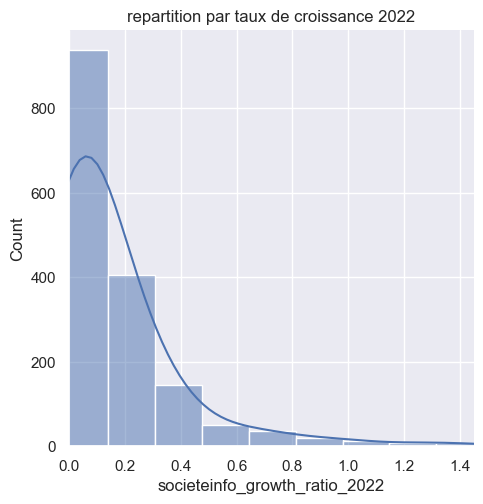

In [29]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(30)]  # Range de 0 à 140% par tranche de 15%

sns.displot(data=source_entreprise_extract, x='societeinfo_growth_ratio_2022', bins=25, kde=True) 
plt.title("repartition par taux de croissance 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

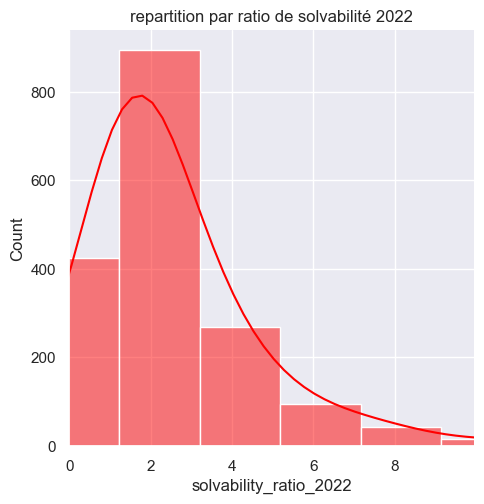

In [30]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(200)]  

sns.displot(data=source_entreprise_extract, x='solvability_ratio_2022', bins=25, color='red',kde=True) 
plt.title("repartition par ratio de solvabilité 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

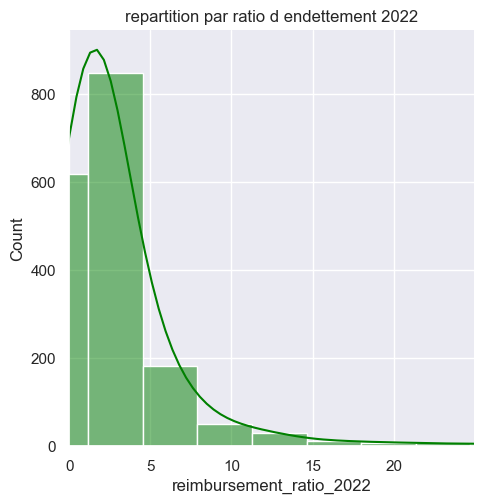

In [31]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(500)]  

sns.displot(data=source_entreprise_extract, x='reimbursement_ratio_2022', color='green', bins=25, kde=True) 
plt.title("repartition par ratio d endettement 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

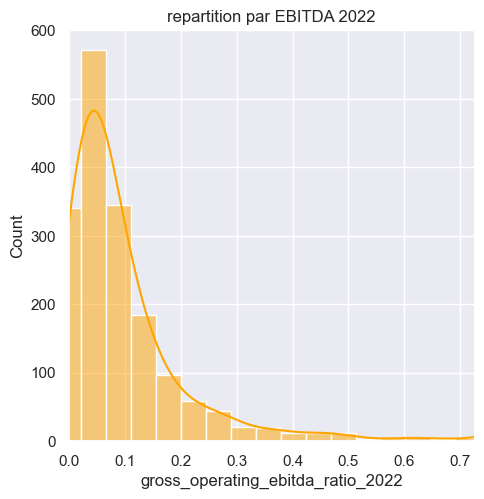

In [32]:

plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [-0.5 + 0.025 * i for i in range(50)]  

sns.displot(data=source_entreprise_extract, x='gross_operating_ebitda_ratio_2022', color='orange', bins=25, kde=True) 
plt.title("repartition par EBITDA 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

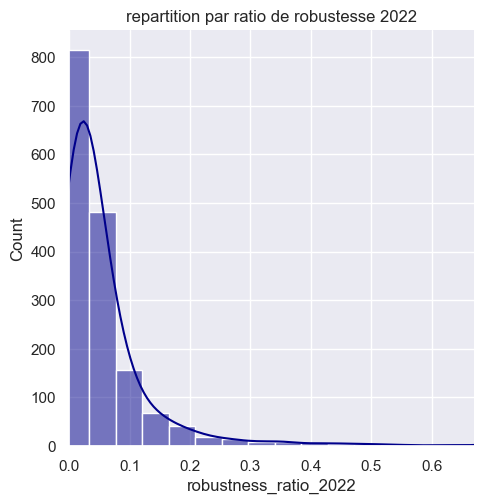

In [33]:

plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [-0.5 + 0.03 * i for i in range(40)]  

sns.displot(data=source_entreprise_extract, x='robustness_ratio_2022', color='darkblue', bins=25, kde=True) 
plt.title("repartition par ratio de robustesse 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

In [34]:
#referentiel base secteur
source_secteur=pd.read_csv('base_secteur_initiale.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_secteur.shape

(371, 212)

In [112]:
def attribuer_classification(source_entreprise_extract):
    # Initialise la nouvelle colonne 'classification'
    source_entreprise_extract['classification'] = 'Non classifié'  # Valeur par défaut
    
    # Conditions pour 'Pépite'
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= 0.05) & (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5) &
        (source_entreprise_extract['CAGR_18_22'] > 0.03) & (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > 0.2) &
        (source_entreprise_extract['robustness_ratio_2022'] > 0.07) & (source_entreprise_extract['solvability_ratio_2022'] > 1.5),
        'classification'] = 'Pépite'
    
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= (1.3 * source_entreprise_extract['societeinfo_growth_ratio_2022_moy_sect'])) & (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5) &
        (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > (1.3 * source_entreprise_extract['gross_operating_ebitda_ratio_2022_moy_sect'])) &
        (source_entreprise_extract['CAGR_18_22'] > 0.03),
        'classification'] = 'Pépite'
    
    # Conditions pour 'À risque'
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0) & (source_entreprise_extract['CAGR_18_22'] <=0) &
        (source_entreprise_extract['solvability_ratio_2022'] <= 1),
        'classification'] = 'À risque'
         
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < (1.2 * source_entreprise_extract['societeinfo_growth_ratio_2022_moy_sect'])) & (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5) &
        (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] < (1.2 * source_entreprise_extract['gross_operating_ebitda_ratio_2022_moy_sect'])) &
        (source_entreprise_extract['CAGR_18_22'] <=0),
        'classification'] = 'À risque'
    
    # Conditions pour 'À surveiller'
    conditions_surveiller = (
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0).astype(int) + (source_entreprise_extract['reimbursement_ratio_2022'] > 2.5).astype(int) +
        (source_entreprise_extract['CAGR_18_22'] < 0.03).astype(int) + (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] < 0.10).astype(int) +
        (source_entreprise_extract['robustness_ratio_2022'] < 0.02).astype(int) + (source_entreprise_extract['solvability_ratio_2022'] < 1).astype(int))
        
    source_entreprise_extract.loc[(conditions_surveiller >= 2) & (source_entreprise_extract['classification'] == 'Non classifié'), 'classification'] = 'À surveiller'
    
    # Conditions pour 'À potentiel'
    
    conditions_potentiel = (
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= 0.05).astype(int) + (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5).astype(int) +
        (source_entreprise_extract['CAGR_18_22'] > 0.03).astype(int) + (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > 0.2).astype(int) +
        (source_entreprise_extract['robustness_ratio_2022'] > 0.07).astype(int) + (source_entreprise_extract['solvability_ratio_2022'] > 1.5).astype(int))
      
    source_entreprise_extract.loc[(conditions_potentiel >= 2) & (source_entreprise_extract['classification'] == 'Non classifié'), 'classification'] == 'À potentiel'
    
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= (1.1*source_entreprise_extract['societeinfo_growth_ratio_2022_moy_sect'])) & (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5) &
        (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > (1.1*source_entreprise_extract['gross_operating_ebitda_ratio_2022_moy_sect'])) &
        (source_entreprise_extract['CAGR_18_22'] <= 0.03),
        'classification'] = 'À potentiel'
         
    # Retourne le DataFrame modifié
    return source_entreprise_extract

# Applique la fonction

source_entreprise_extract = attribuer_classification(source_entreprise_extract)


In [113]:
à_risque=source_entreprise_extract[source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0]
à_risque=à_risque[['societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']]
à_risque.head(100)

,societeinfo_growth_ratio_2022,reimbursement_ratio_2022,CAGR_18_22,gross_operating_ebitda_ratio_2022,robustness_ratio_2022,solvability_ratio_2022
2,-0.203398,0.102249,2.000000,-0.049504,0.269365,0.461850
70,-0.010576,0.302580,0.112140,0.096840,0.038308,0.235925
111,-0.014912,0.386211,0.136288,0.068245,0.027943,1.001231
112,-0.143421,2.267511,0.127080,0.054299,0.022460,3.029226
118,-0.174710,4.261895,0.547461,0.005300,0.002415,5.155615
...,...,...,...,...,...,...
2734,-0.040491,1.203484,-0.149551,0.009573,0.006545,2.100162
2795,-0.099935,-9.421868,0.382567,-0.035539,-0.164217,-8.298440
2836,-0.248110,2.089734,0.126988,0.095525,0.017431,2.407115
2851,-0.287386,3.047034,0.231154,0.049239,0.032025,3.786950


In [114]:
## CLASSEMENT MANUEL

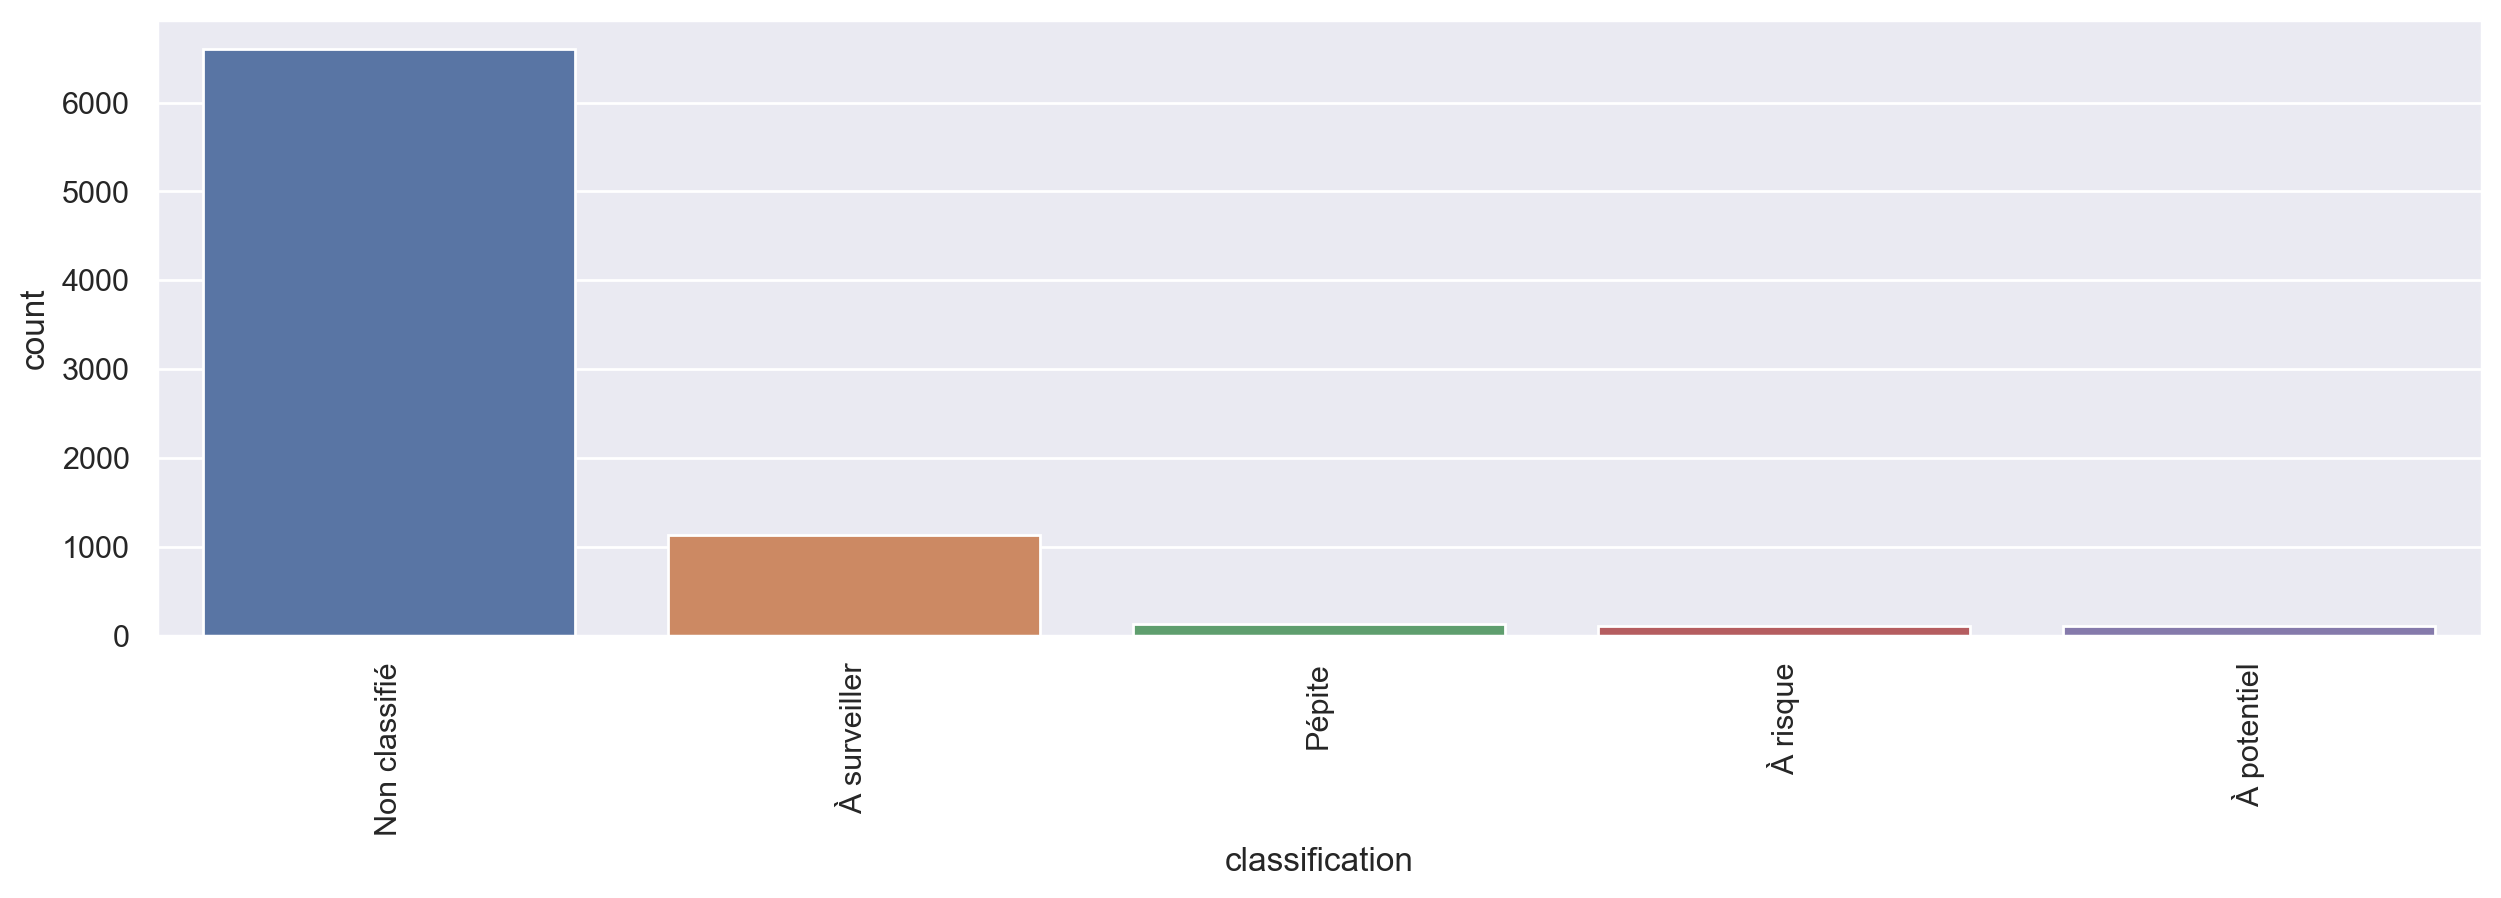

In [115]:

plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= source_entreprise_extract)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [116]:
panel_classifié =source_entreprise_extract[source_entreprise_extract['classification']!='Non classifié']


In [117]:
panel_classifié .shape

(1495, 91)

In [118]:
panel_non_classifié =source_entreprise_extract[source_entreprise_extract['classification']=='Non classifié']


In [119]:
panel_non_classifié .shape

(6600, 91)

In [120]:
nombre_par_categorie = source_entreprise_extract['classification'].value_counts()
print(nombre_par_categorie)

classification
Non classifié    6600
À surveiller     1138
Pépite            132
À risque          115
À potentiel       110
Name: count, dtype: int64


In [121]:
## CONSTITUTION DES DATAS DE TEST ET D 'ENTRAINEMENT'

In [122]:
features = panel_classifié[['societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']]

In [123]:
features.shape

(1495, 6)

In [124]:
valeur_attendue = panel_classifié[['classification']]

In [125]:
valeur_attendue.shape

(1495, 1)

## Affichage des correlations entre criteres

Text(0.5, 1.0, 'Distribution solvabilité / robustesse')

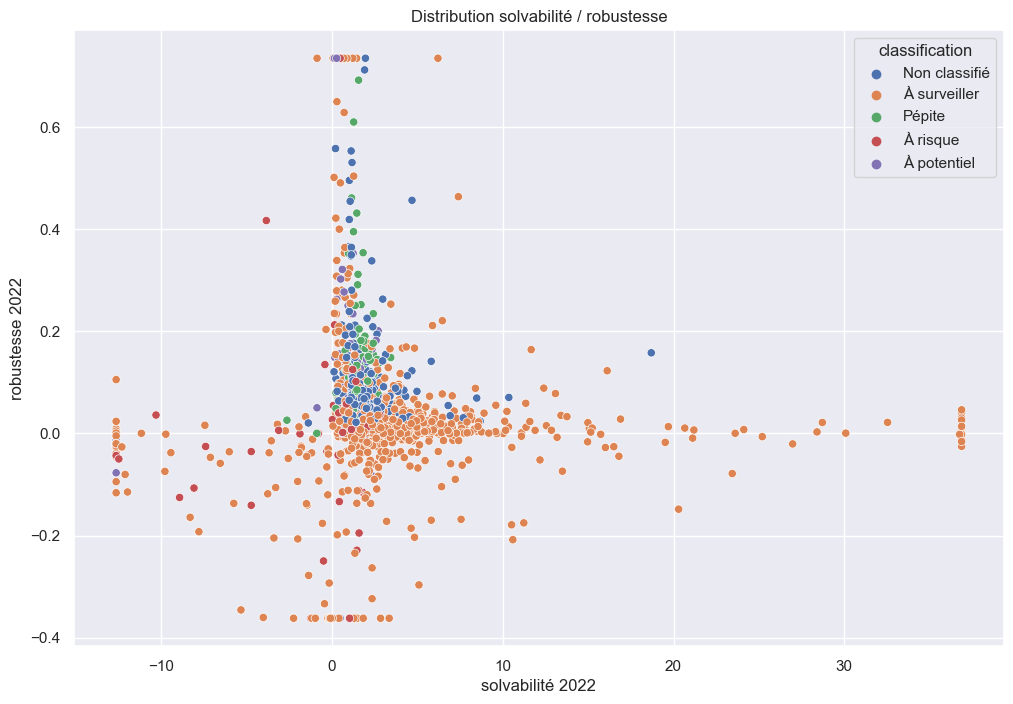

In [126]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='solvability_ratio_2022',y='robustness_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('solvabilité 2022')
plt.ylabel('robustesse 2022')
plt.title('Distribution solvabilité / robustesse')

Text(0.5, 1.0, 'Distribution croissance / endettement')

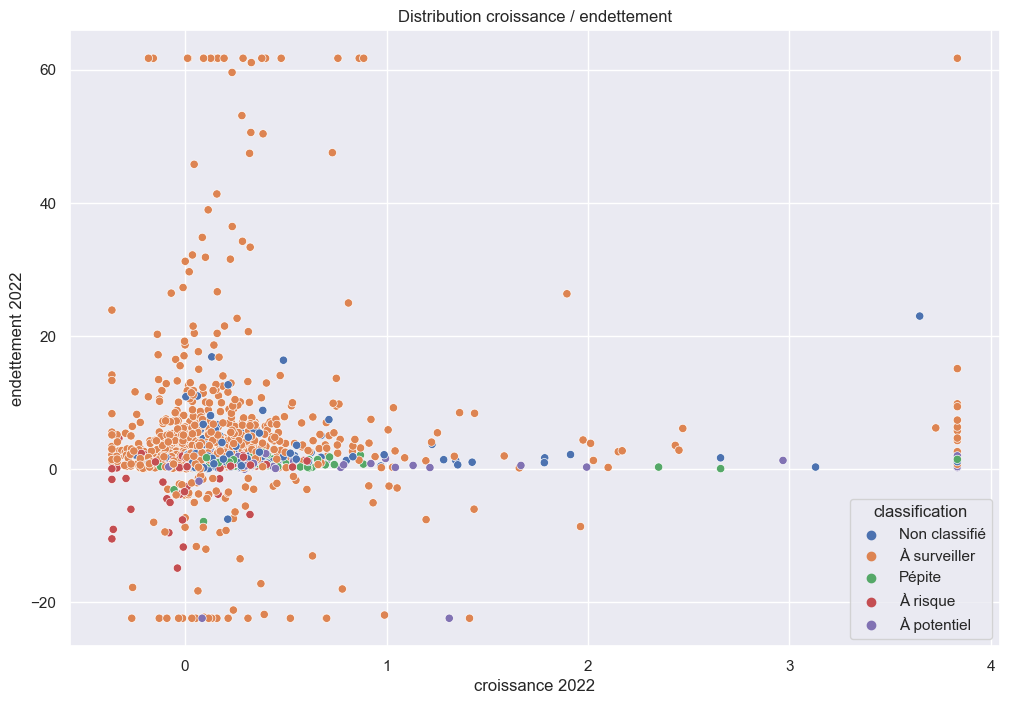

In [127]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='societeinfo_growth_ratio_2022',y='reimbursement_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('croissance 2022')
plt.ylabel('endettement 2022')
plt.title('Distribution croissance / endettement')

Text(0.5, 1.0, 'Distribution croissance / rentabilité')

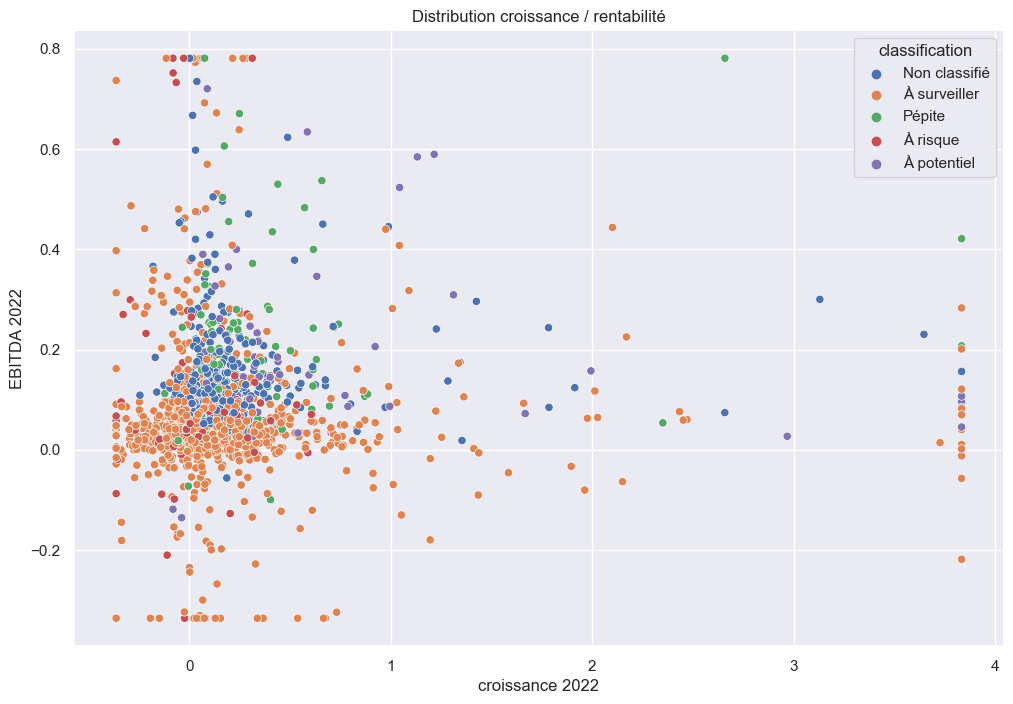

In [128]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='societeinfo_growth_ratio_2022',y='gross_operating_ebitda_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('croissance 2022')
plt.ylabel('EBITDA 2022')
plt.title('Distribution croissance / rentabilité')

## Modele de classification



In [129]:
# Identifier les colonnes avec des valeurs NaN
nan_counts = features.isna().sum()

# Afficher le nombre de valeurs NaN par colonne
print(nan_counts)

societeinfo_growth_ratio_2022        66
reimbursement_ratio_2022             28
CAGR_18_22                            0
gross_operating_ebitda_ratio_2022    19
robustness_ratio_2022                19
solvability_ratio_2022               28
dtype: int64


In [130]:
# Supprimer les lignes contenant des NaN
cleaned_data = features.dropna()
cleaned_labels = valeur_attendue.loc[cleaned_data.index]  # Assurez-vous que les étiquettes correspondent aux données nettoyées

In [131]:

# Préparation des données
X = cleaned_data
y = cleaned_labels

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [132]:
# Avant de supprimer les lignes, assurez-vous que la longueur des ensembles X et y est la même
# Siaucune erreur, cela signifie que les assertions sont passées : les longueurs de X_train et y_train sont identiques, 
# de même que celles de X_test et y_test. Il n'y a pas de "résultat" au sens habituel à voir ; 
# l'absence d'erreur est en elle-même le résultat indiquant que les conditions d'assertion sont remplies.


assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [133]:
# presence de NaN dans y_train / y_test
unique_categories_y_train = np.unique(y_train)
print("Catégories uniques dans y_train:", unique_categories_y_train)

unique_categories_y_test = np.unique(y_test)
print("Catégories uniques dans y_test:", unique_categories_y_test)


Catégories uniques dans y_train: ['Pépite' 'À potentiel' 'À risque' 'À surveiller']
Catégories uniques dans y_test: ['Pépite' 'À potentiel' 'À risque' 'À surveiller']


In [134]:
# Identifier les colonnes avec des valeurs NaN pour les DataFrames
nan_counts_X_train = X_train.isna().sum()
nan_counts_X_test = X_test.isna().sum()
print("NaN dans X_train:", nan_counts_X_train)
print("NaN dans X_test:", nan_counts_X_test)

NaN dans X_train: societeinfo_growth_ratio_2022        0
reimbursement_ratio_2022             0
CAGR_18_22                           0
gross_operating_ebitda_ratio_2022    0
robustness_ratio_2022                0
solvability_ratio_2022               0
dtype: int64
NaN dans X_test: societeinfo_growth_ratio_2022        0
reimbursement_ratio_2022             0
CAGR_18_22                           0
gross_operating_ebitda_ratio_2022    0
robustness_ratio_2022                0
solvability_ratio_2022               0
dtype: int64


In [135]:
# Choix du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Pépite       0.88      0.71      0.79        21
 À potentiel       0.63      0.60      0.62        20
    À risque       0.45      0.39      0.42        23
À surveiller       0.88      0.92      0.90       218

    accuracy                           0.84       282
   macro avg       0.71      0.66      0.68       282
weighted avg       0.83      0.84      0.83       282



C:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [136]:
# Pépite :

# Précision (Precision) : 100% signifie que toutes les prédictions de la classe "Pépite" étaient correctes. Cependant, cela doit être interprété avec prudence en raison du petit nombre d'échantillons.
# Rappel (Recall) : 20% signifie que seulement 20% des vraies "Pépite" ont été correctement identifiées par le modèle. Cela indique une faiblesse dans la capacité du modèle à détecter cette classe spécifique.
# Score F1 : 33% est assez bas, ce qui reflète le déséquilibre entre la précision et le rappel pour cette classe.

# À potentiel :

# Précision : 95% est excellent et indique que la grande majorité des prédictions pour cette classe étaient correctes.
# Rappel : 90% est également très bon, indiquant que le modèle a réussi à identifier la majorité des cas réels "À potentiel".
# Score F1 : 93% est un excellent score, indiquant un bon équilibre entre précision et rappel.

# À surveiller :

# Précision : 97% montre que presque toutes les entreprises classées comme "À surveiller" l'étaient à juste titre.
# Rappel : 100% indique que toutes les entreprises réellement à surveiller ont été détectées par le modèle.
# Score F1 : 98% est exceptionnellement élevé, reflétant d'excellentes performances à la fois en termes de précision et de rappel.

In [137]:

# Rééchantillonnage des ensembles de données X_train et y_train
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vous pouvez maintenant utiliser X_train_resampled et y_train_resampled pour entraîner votre modèle

# Entraînement du modèle
model.fit(X_train_resampled, y_train_resampled)


C:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [138]:
# Ajustement des pénalités de classe

# Créer le modèle avec des poids de classe équilibrés
model = RandomForestClassifier(n_estimators=200, random_state=84, class_weight='balanced')

# Entraîner le modèle avec les données rééchantillonnées
model.fit(X_train_resampled, y_train_resampled)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=84)

In [139]:
# Évaluation du modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Pépite       0.85      0.81      0.83        21
 À potentiel       0.53      0.85      0.65        20
    À risque       0.45      0.65      0.54        23
À surveiller       0.95      0.86      0.90       218

    accuracy                           0.84       282
   macro avg       0.70      0.79      0.73       282
weighted avg       0.87      0.84      0.85       282



In [140]:
# Initialiser le LabelEncoder
le = LabelEncoder()

# Encoder les étiquettes de l'ensemble d'entraînement et de test (categorie Classification)
y_train_encoded = le.fit_transform(y_train_resampled)
y_test_encoded = le.transform(y_test)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [141]:


# Création et entraînement du modèle XGBoost
xgb_model = XGBClassifier(random_state=84, scale_pos_weight=5)  # Ajustez scale_pos_weight si nécessaire
xgb_model.fit(X_train_resampled, y_train_encoded)

C:\Users\chris\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [06:47:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [142]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.53      0.80      0.64        20
           2       0.43      0.57      0.49        23
           3       0.95      0.88      0.91       218

    accuracy                           0.85       282
   macro avg       0.70      0.79      0.73       282
weighted avg       0.88      0.85      0.86       282



In [143]:
# Classe 0 1 2 3 (pepite / À potentiel / À surveiller / risque)

# Précision : indique le niveau de prédictions de cette classe correctes. 
# Rappel : signifie que le modèle n'a correctement identifié que x% des instances réelles de cette classe. 
# Score F1 : une moyenne harmonique entre la précision et le rappel, indiquant que la performance du modele



In [144]:

company_ids = panel_non_classifié['siren'].copy()  # Copiez les identifiants pour les utiliser plus tard

# supprimez les colonnes non nécessaires pour XGBoost, sans toucher à 'company_id'
cols_to_keep = ['siren','societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']
X_full = panel_non_classifié[cols_to_keep]
X_full.head(5)

,siren,societeinfo_growth_ratio_2022,reimbursement_ratio_2022,CAGR_18_22,gross_operating_ebitda_ratio_2022,robustness_ratio_2022,solvability_ratio_2022
0,751570003.0,NaN,NaN,0.393102,NaN,NaN,NaN
1,304234636.0,NaN,NaN,0.014430,NaN,NaN,NaN
3,830671855.0,NaN,NaN,2.000000,NaN,NaN,NaN
4,404362576.0,NaN,NaN,-0.003962,NaN,NaN,NaN
5,342902228.0,NaN,NaN,0.024261,NaN,NaN,NaN


In [145]:
# Séparer les identifiants et les caractéristiques
company_ids = X_full['siren'].copy()  # Conservez les identifiants
X_full = X_full.drop(columns=['siren'])  # Supprimez l'identifiant pour la prédiction

In [146]:

# Utilisez le modèle pour faire des prédictions sur l'ensemble de données complet.
y_full_pred = xgb_model.predict(X_full)

# décoder les prédictions pour revenir aux étiquettes originales :
y_full_pred_decoded = le.inverse_transform(y_full_pred)

In [147]:
# Créer un DataFrame pour les résultats
results_df = pd.DataFrame({'siren': company_ids, 'classification': y_full_pred_decoded})

# Fusionner les prédictions avec le DataFrame initial
merged_df = pd.merge(panel_non_classifié, results_df, on='siren', how='left')

In [148]:
merged_df.head(5)

,ape_code,revenue_2022,resultat_exploitation_ratio_2022,last_number_of_employees,enrollment,equity_2022,current_assets_2022,gross_operating_ebitda_ratio_2022,net_result_2022,current_liabilities_2022,...,net_debt_2022_sum,gross_operating_ebitda_2022_sum,resultat_d_exploitation_2022_sum,net_result_sum,revenue_sum,net_debt_sum,pdm,pdm_2022,classification_x,classification_y
0,6820A,NaN,NaN,51.0,51.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,5894515.25,110850690.5,526892426.0,0.061445,NaN,Non classifié,À surveiller
1,6820A,NaN,NaN,62.0,62.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,5894515.25,110850690.5,526892426.0,0.295663,NaN,Non classifié,À surveiller
2,6820A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,5894515.25,110850690.5,526892426.0,0.038432,NaN,Non classifié,À surveiller
3,6820A,NaN,NaN,298.0,298.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,5894515.25,110850690.5,526892426.0,1.013155,NaN,Non classifié,À surveiller
4,6820A,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,5894515.25,110850690.5,526892426.0,0.064972,NaN,Non classifié,À surveiller


In [149]:
print(merged_df.columns)

Index(['ape_code', 'revenue_2022', 'resultat_exploitation_ratio_2022',
       'last_number_of_employees', 'enrollment', 'equity_2022',
       'current_assets_2022', 'gross_operating_ebitda_ratio_2022',
       'net_result_2022', 'current_liabilities_2022', 'capital', 'roe_2022',
       'net_debt_2022', 'reimbursement_ratio_2022', 'siren', 'siret',
       'robustness_ratio_2022', 'societeinfo_growth_ratio_2022',
       'gross_operating_ebitda_2022', 'resultat_d_exploitation_2022',
       'solvability_ratio_2022', 'resultat_exploitation_ratio', 'net_result',
       'current_assets', 'equity', 'current_liabilities', 'revenue',
       'robustness_ratio', 'solvability_ratio', 'net_debt',
       'gross_operating_ebitda', 'gross_operating_ebitda_ratio', 'CAGR_18_22',
       'RCI_2022', 'RCI', 'total_fonds', 'equity_costs', 'RdtCpx_2022',
       'RdtCpx', 'reimbursement_ratio', 'RCI_21_22', 'capital_moy_sect',
       'enrollment_moy_sect', 'last_number_of_employees_moy_sect',
       'employees_

In [150]:
merged_df = merged_df.drop(columns=['classification_x'])
merged_df = merged_df.rename(columns={'classification_y': 'classification'})

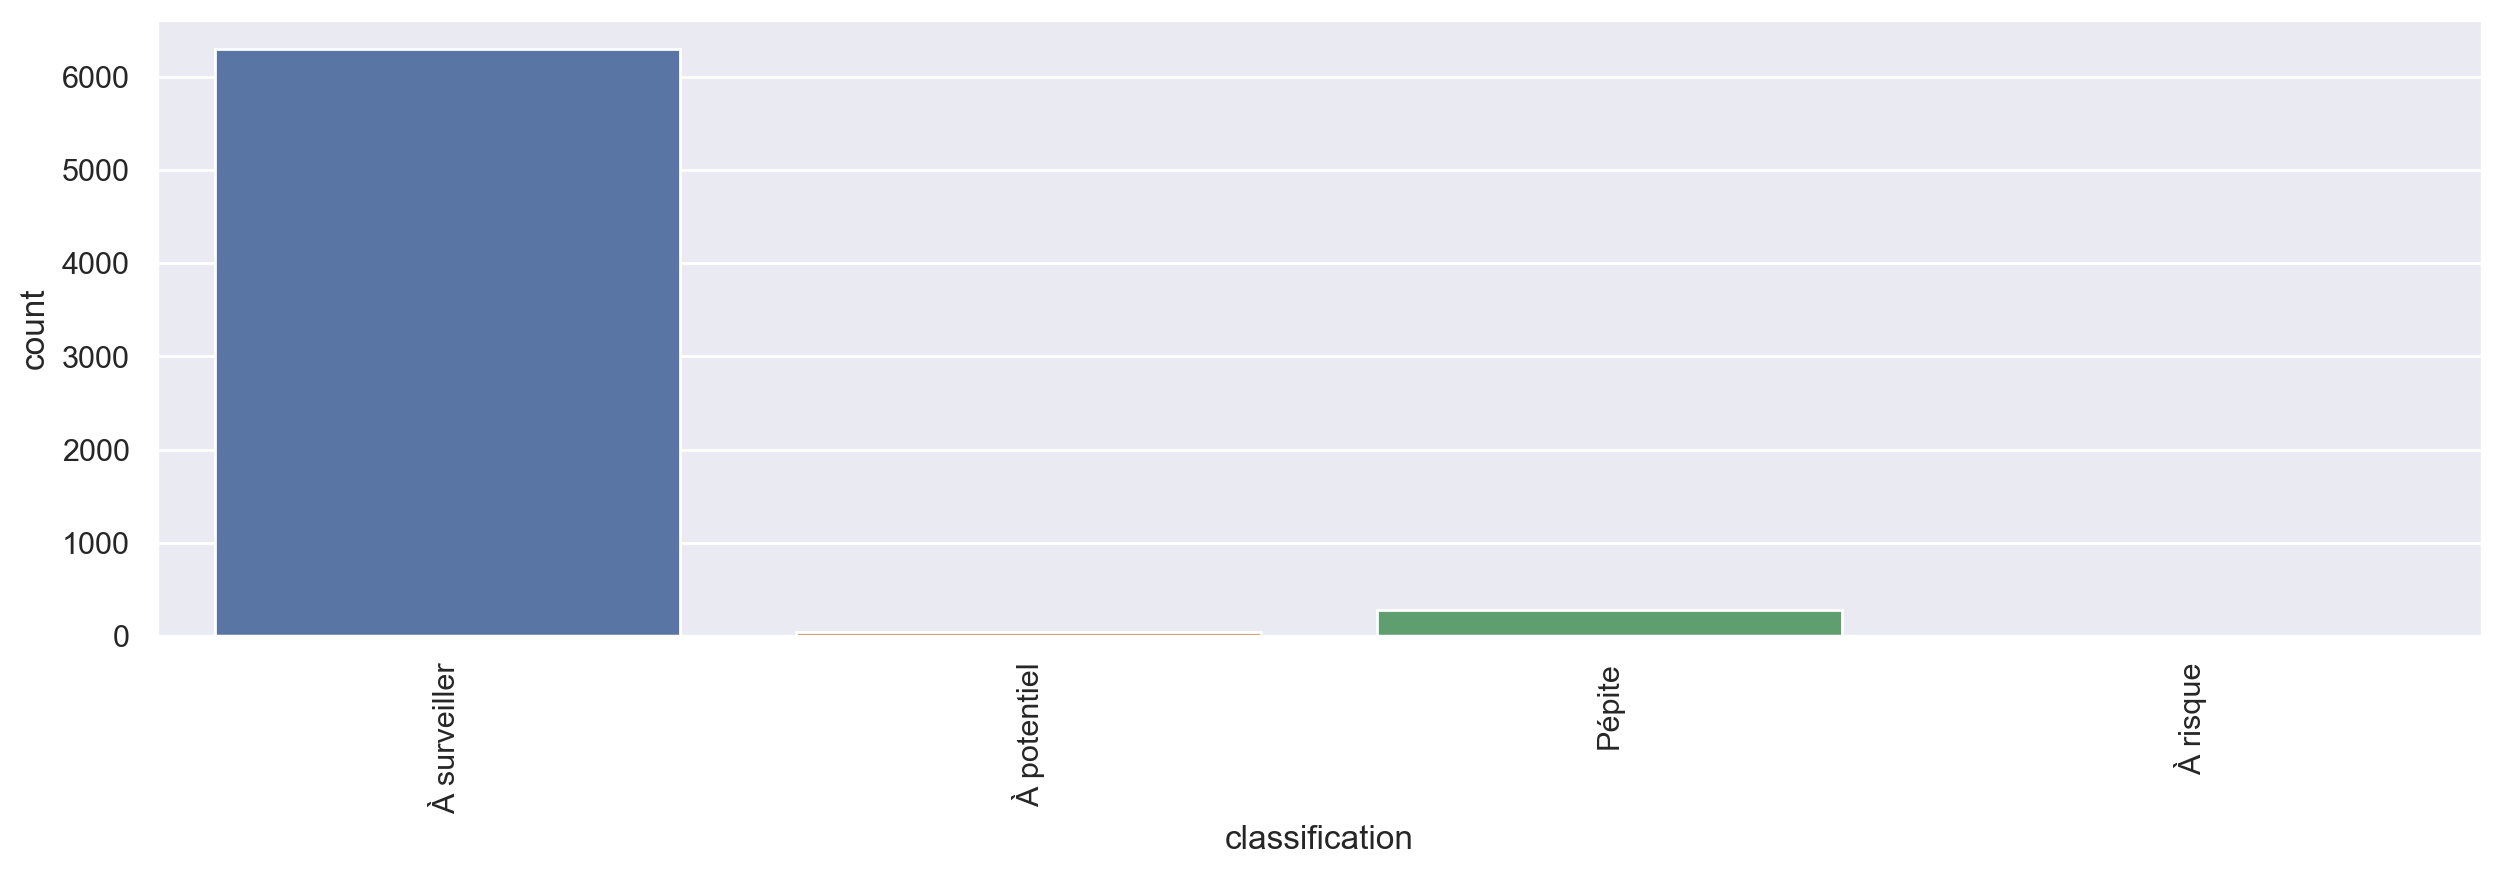

In [151]:

plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= merged_df)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [152]:
nombre_par_categorie = merged_df['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    6299
Pépite           280
À potentiel       41
À risque           2
Name: count, dtype: int64


In [153]:
# reconstituer le fichier complet

# Fusionner avec des suffixes pour identifier les colonnes en double
new_panel = pd.concat([merged_df, panel_classifié])


In [154]:
nombre_par_categorie = merged_df['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    6299
Pépite           280
À potentiel       41
À risque           2
Name: count, dtype: int64


In [155]:
nombre_par_categorie = panel_classifié['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    1138
Pépite           132
À risque         115
À potentiel      110
Name: count, dtype: int64


In [156]:
nombre_par_categorie = new_panel['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    7437
Pépite           412
À potentiel      151
À risque         117
Name: count, dtype: int64


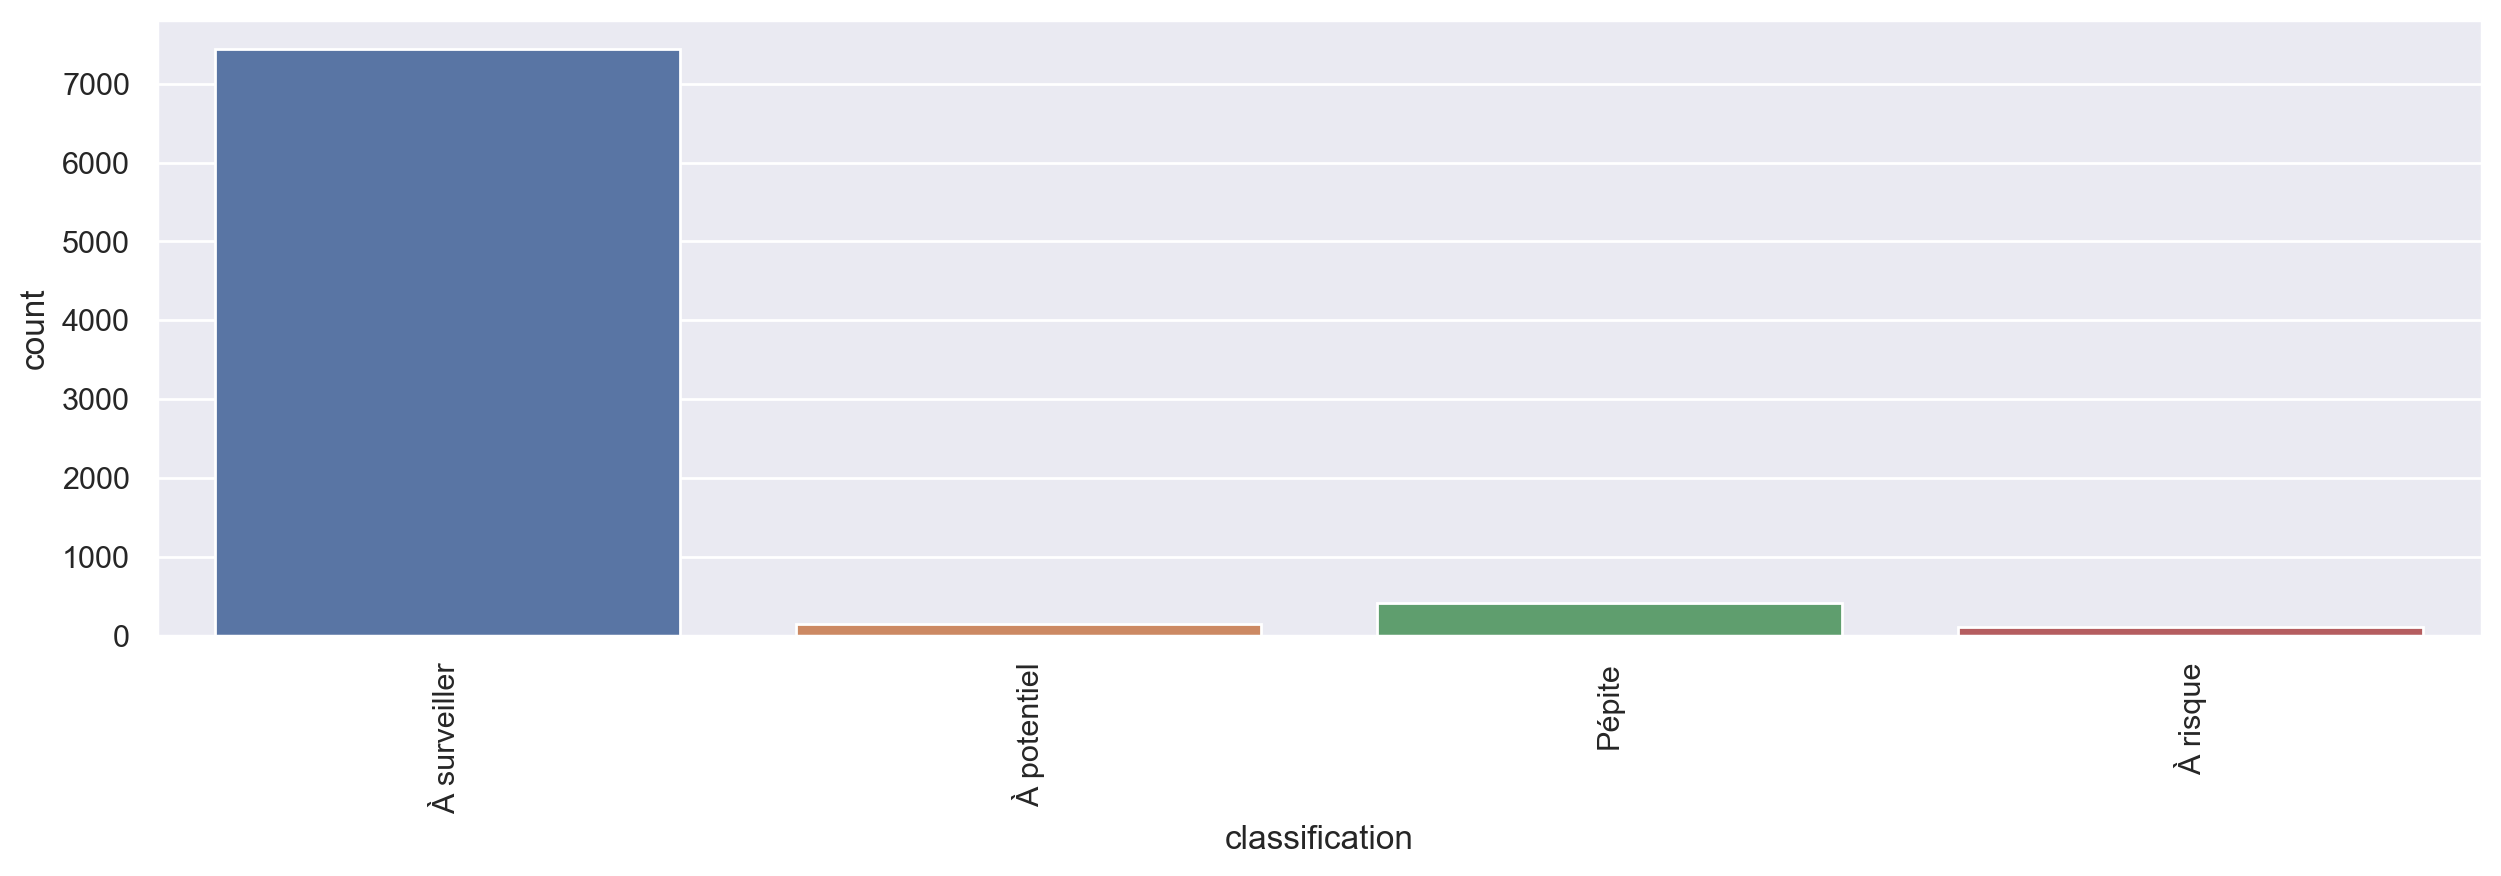

In [157]:
plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= new_panel)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [158]:
nombre_par_categorie = new_panel['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    7437
Pépite           412
À potentiel      151
À risque         117
Name: count, dtype: int64


In [159]:
new_panel.shape

(8117, 91)

In [160]:
# Filtrer le DataFrame pour ne garder que les données des classifications '

filtered_panel_risque = new_panel[new_panel['classification'].isin(['À risque', 'À surveiller'])]
filtered_panel_risque.to_csv('echantillon_risque_et_surveillé.csv', index='siren')

filtered_panel_opps = new_panel[new_panel['classification'].isin(['Pépite', 'À potentiel'])]
filtered_panel_opps.to_csv('echantillon_pepite_et_potentiel.csv', index='siren')

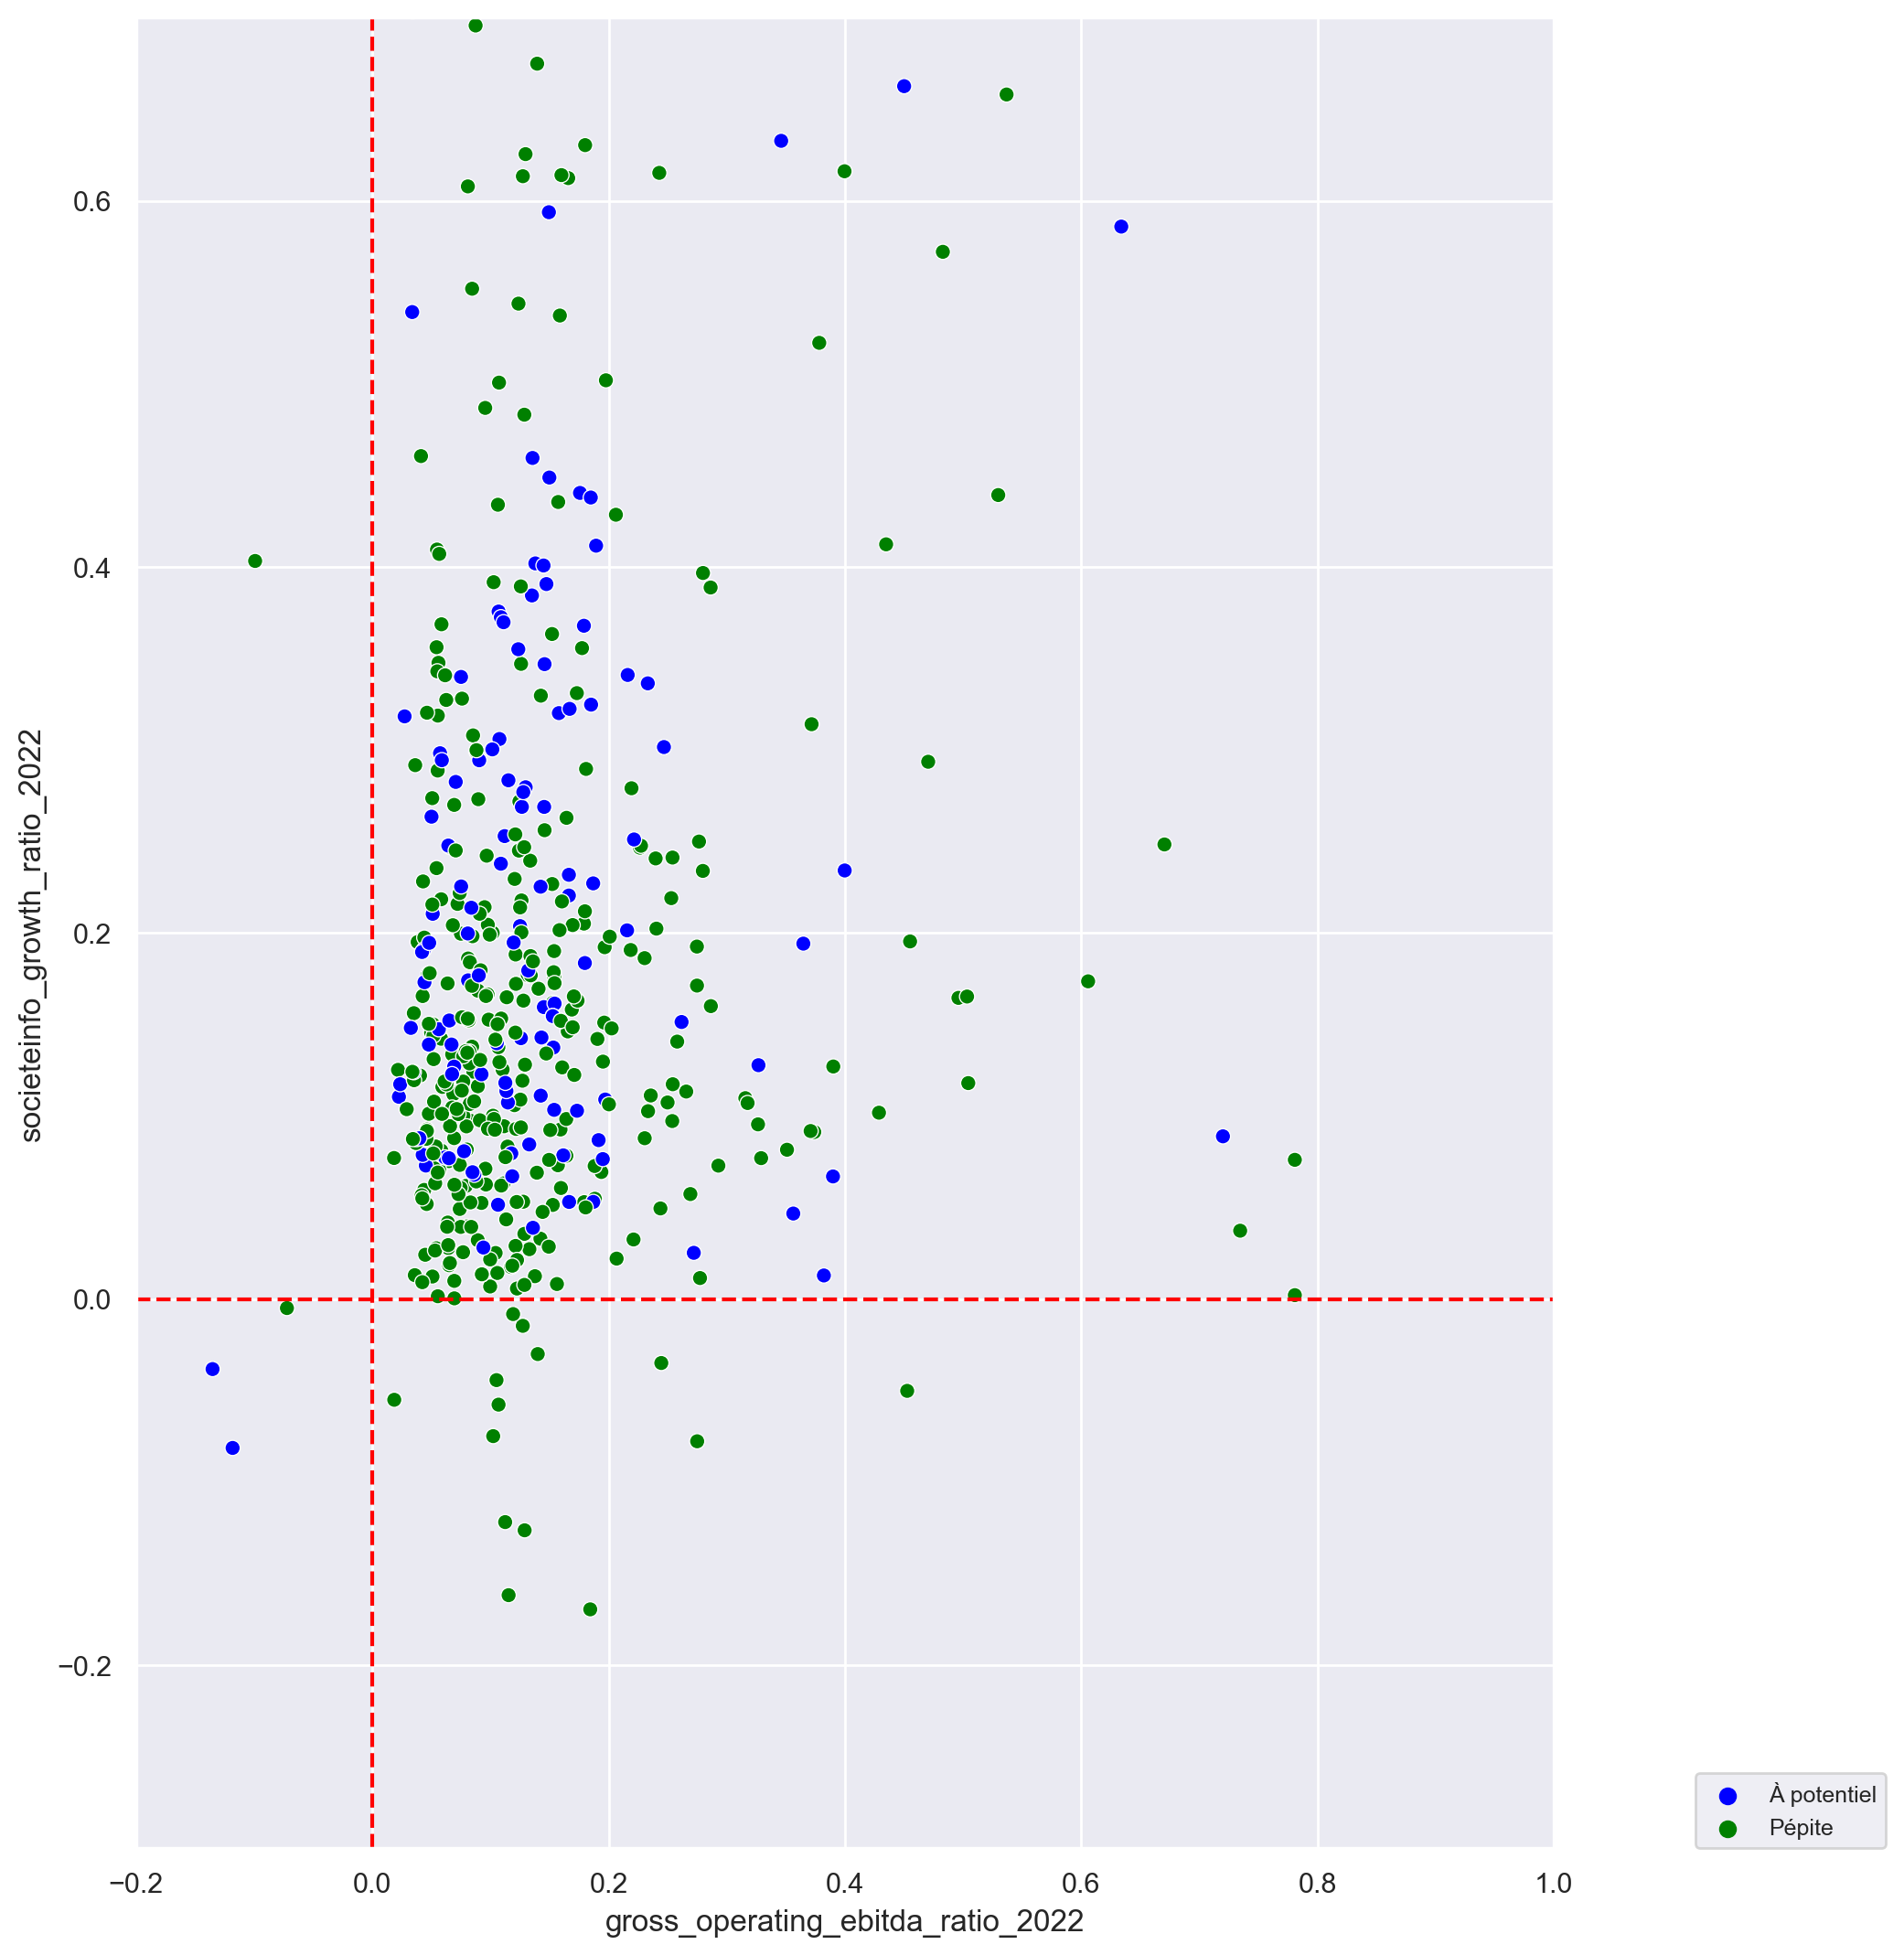

In [161]:
# nuage des entreprises classifiées

plt.figure(figsize=(10,13),dpi=200)
# Définir les couleurs spécifiques pour chaque classification
couleurs = {'Pépite': 'green', 'À potentiel': 'blue'}
ax=sns.scatterplot(x='gross_operating_ebitda_ratio_2022',y='societeinfo_growth_ratio_2022',data=filtered_panel_opps,hue='classification', palette=couleurs)

# La méthode legend() est appelée sur l'objet ax (qui représente les axes du graphique). 
# L'argument loc=(1.1, 0.5) spécifie l'emplacement de la légende par rapport au cadre du graphique, 
# où 1.1 décale la légende à droite du graphique (1 étant juste à la limite droite) 
# et 0.5 positionne la légende au milieu sur l'axe vertical.

ax.axvline(x=0, color='red', linestyle='--')
ax.set_xlim(-0.2,1)
ax.set_ylim(-0.3,0.7)
ax.axhline(y=0, color='red', linestyle='--')
ax.legend(loc=(1.1,0),fontsize=9)
plt.show()

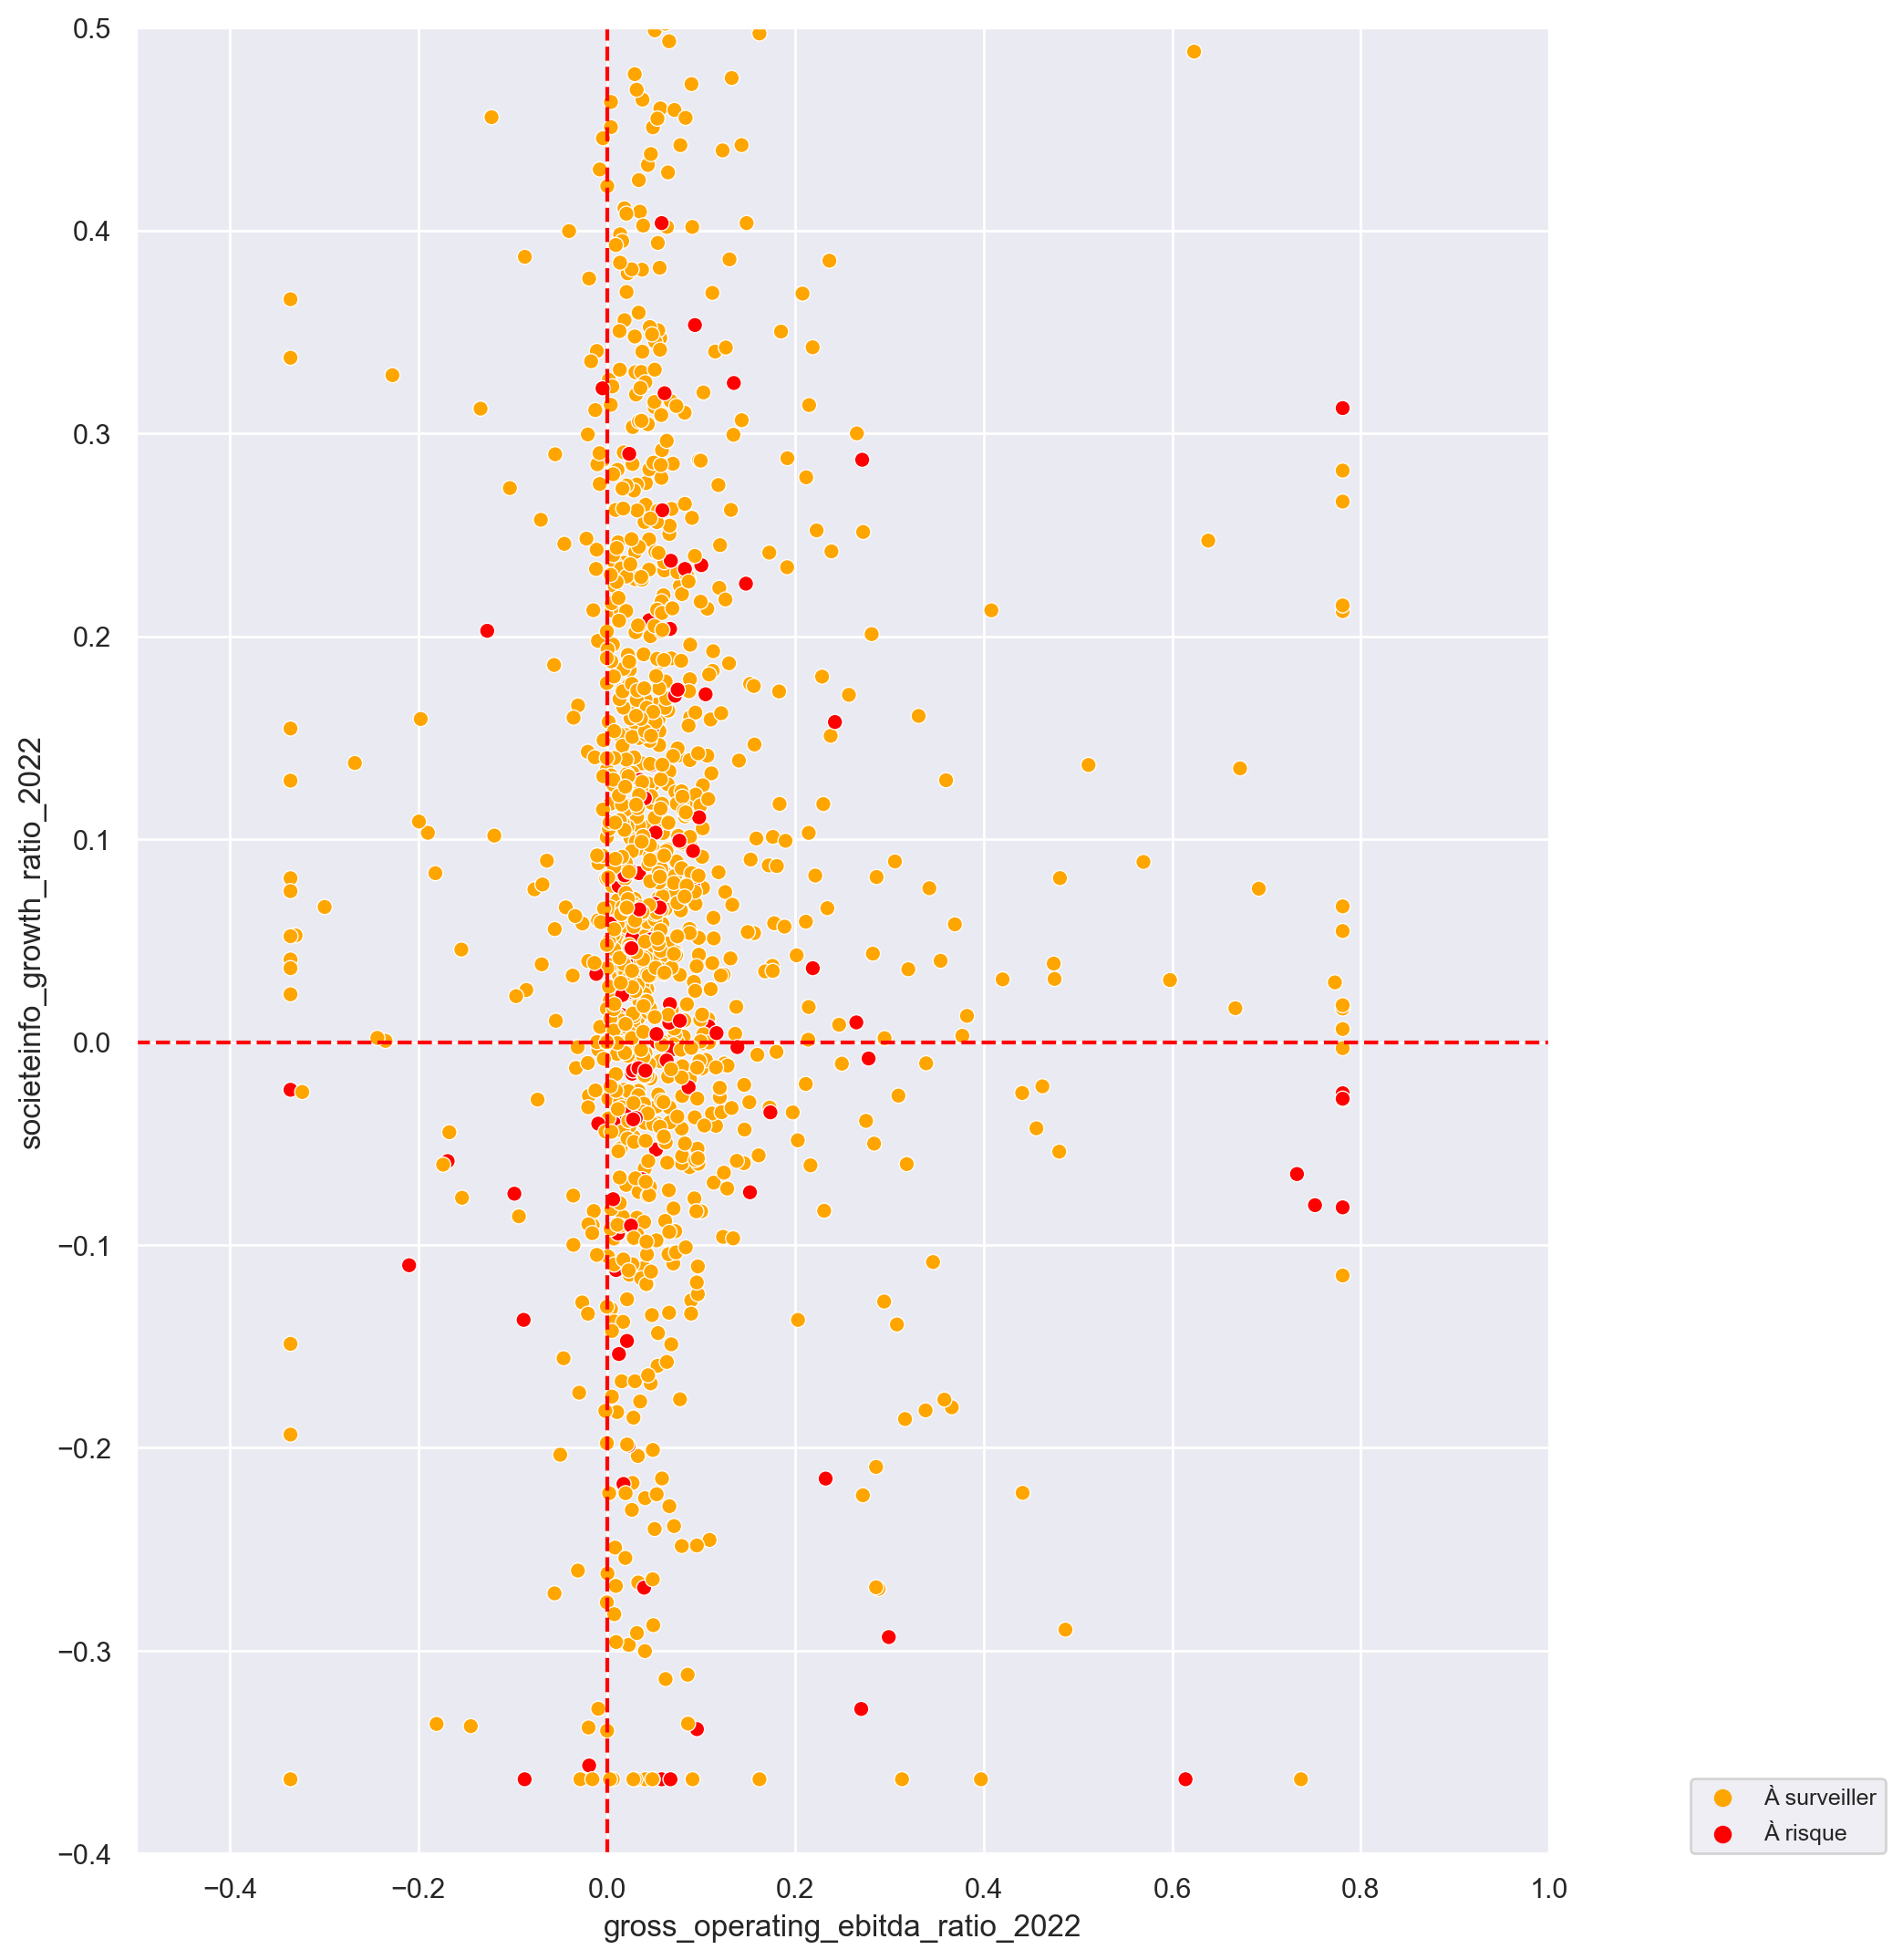

In [162]:
# nuage des entreprises classifiées

plt.figure(figsize=(10,13),dpi=200)
# Définir les couleurs spécifiques pour chaque classification
couleurs = {'À risque': 'red', 'À surveiller': 'orange'}
ax=sns.scatterplot(x='gross_operating_ebitda_ratio_2022',y='societeinfo_growth_ratio_2022',data=filtered_panel_risque,hue='classification', palette=couleurs)

# La méthode legend() est appelée sur l'objet ax (qui représente les axes du graphique). 
# L'argument loc=(1.1, 0.5) spécifie l'emplacement de la légende par rapport au cadre du graphique, 
# où 1.1 décale la légende à droite du graphique (1 étant juste à la limite droite) 
# et 0.5 positionne la légende au milieu sur l'axe vertical.

ax.axvline(x=0, color='red', linestyle='--')
ax.set_xlim(-0.5,1)
ax.set_ylim(-0.4,0.5)
ax.axhline(y=0, color='red', linestyle='--')
ax.legend(loc=(1.1,0),fontsize=9)
plt.show()

In [163]:
new_panel.to_csv('base_source_classifié.csv', index='siren')